In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [12., 4.]

#Load the dataset
battles = pd.read_csv('battles.csv')
character_deaths = pd.read_csv('character-deaths.csv')
character_predictions = pd.read_csv('character-predictions.csv')

In [2]:
#Print first 5 rows of dataframe
character_predictions.head()

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [3]:
#Drop the features such as Dob, Dod, mother, father, heir, spouse
character_predictions = character_predictions.drop(['dateOfBirth','DateoFdeath', 'mother', 'father', 'heir', 'spouse'], axis = 1)

In [4]:
character_predictions.describe()

,male,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,0.619219,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,0.485704,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Drop features such as isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse, Age as they have very few entries
character_predictions.drop(['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age'], axis = 1, inplace = True)

In [6]:
#Store character's name in another Series
char_name = character_predictions['name']
character_predictions.drop('name', axis = 1 , inplace = True)

In [7]:
#Scale numDeadRelations feature
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
character_predictions['numDeadRelations'] = scaler.fit_transform(character_predictions['numDeadRelations'])

/home/shubham/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/shubham/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/shubham/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [8]:
#Split the dataset into features and labels
label_characters = character_predictions['isAlive']
feature_characters = character_predictions.drop('isAlive', axis =1)

In [9]:
feature_characters = pd.get_dummies(feature_characters)

In [10]:
feature_characters.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,...,house_The Citadel,house_Thenn,house_Thirteen,house_Three-eyed crow,house_Undying Ones,house_Unsullied,house_Windblown,house_Wise Masters,house_brotherhood without banners,house_wildling
0,1,0,0,0,0,0,0,0,0.733333,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0.066667,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,1,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,1,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#We will need to do feature selection as currently we have a lot of (685) features. We will use SelectFromModel from sklearn

#Import the libraries
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

#Using a linear SVC with C = 0.1. Lower the value of C, lesser the number of features we will get
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(feature_characters, label_characters)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(feature_characters)

In [12]:
X_new.shape

(1946, 32)

In [13]:
#Get indexes for selected features
selected_features = model.get_support() 
np.where(selected_features)

(array([  0,   1,   2,   3,   4,   5,   6,   9,  11,  38, 108, 176, 229,
        288, 290, 293, 304, 325, 327, 329, 342, 343, 378, 387, 454, 469,
        503, 590, 604, 614, 616, 665]),)

In [14]:
#Store selected features in a dataframe
scaled_feature_characters = feature_characters.iloc[:,selected_features]

In [15]:
scaled_feature_characters.head()

,male,book1,book2,book3,book4,book5,isMarried,boolDeadRelations,popularity,title_Casterly Rock,...,house_House Blackwood,house_House Bracken,house_House Frey,house_House Greyjoy,house_House Lannister,house_House Stark,house_House Targaryen,house_House Tully,house_House Tyrell,house_Night's Watch
0,1,0,0,0,0,0,0,1,0.605351,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0.896321,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0.267559,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0.183946,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0.043478,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#We will use a Support Vector Classifier with cross-validation techniques to make our predictions
#We split the data into training and testing set (80-20)
#Further, we will divide the training set into 10 subsets and take each as testing set once and average out accuracy
#Later, we will tune our SVM parameters to see if we can improve our accuracy

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_feature_characters, label_characters, test_size = 0.2, random_state = 42)

from sklearn import svm
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(X_train), n_folds=10, shuffle=True, random_state=0)
clf = svm.SVC()

scores = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/home/shubham/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy: 0.76 (+/- 0.06)


In [17]:
#We will now use Grid Search to hypertune our parameter kernel before using our classifier on testing set
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, accuracy_score

#Create the parameters list we wish to tune
parameters = {'kernel': ['linear', 'rbf', 'poly']
             }

#Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

#Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

#Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_


/home/shubham/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [18]:
best_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
pred_char = best_clf.predict(X_test)
print accuracy_score(y_test, pred_char)

0.782051282051


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()

clf1.fit(X_train,y_train)

pred= clf1.predict(X_test)
print accuracy_score (y_test, pred)


0.797435897436


In [21]:
#Hypertune parameters of Random Forest Classifier

parameters = {'n_estimators': [10,50,100],
             'min_samples_split': [2,10,20,50],
             'max_features': ['sqrt', 'log2', 'auto']}

#Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf1, parameters, scoring=scorer)

#Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

In [22]:
from sklearn.metrics import precision_score, recall_score

best_predictions = best_clf.predict(X_test)


precision =  precision_score(best_predictions,y_test)
recall = recall_score(best_predictions, y_test)
accuracy = accuracy_score(y_test, best_predictions)
f_beta = fbeta_score(y_test, best_predictions, beta = 0.5)

print "Precision: {:.4f}".format(precision)
print "Recall: {:.4f}".format(recall)
print "Final accuracy score on the testing data: {:.4f}".format(accuracy)
print "Final F-score on the testing data: {:.4f}".format(f_beta)

Precision: 0.9257
Recall: 0.8509
Final accuracy score on the testing data: 0.8205
Final F-score on the testing data: 0.8649


In [23]:
importances = clf1.feature_importances_
indices = np.argsort(importances)[::-1]

In [24]:
print feature_characters.iloc[:,indices].head()

   numDeadRelations  book4  book5  male  book1  isNoble  book3  \
0          0.733333      0      0     1      0        0      0   
1          0.066667      1      1     1      1        1      1   
2          0.000000      1      0     1      0        1      0   
3          0.000000      0      0     0      0        1      0   
4          0.000000      1      0     0      0        1      0   

   title_Acorn Hall  book2  title_Brightwater    ...      title_Brother  \
0                 0      0                  0    ...                  0   
1                 0      1                  0    ...                  0   
2                 0      0                  0    ...                  0   
3                 0      0                  0    ...                  0   
4                 0      0                  0    ...                  0   

   title_Blackcrown  popularity  title_Arbor  title_Bear Island  \
0                 0    0.605351            0                  0   
1                 

## Finding Relationship between survival and number of dead relatives

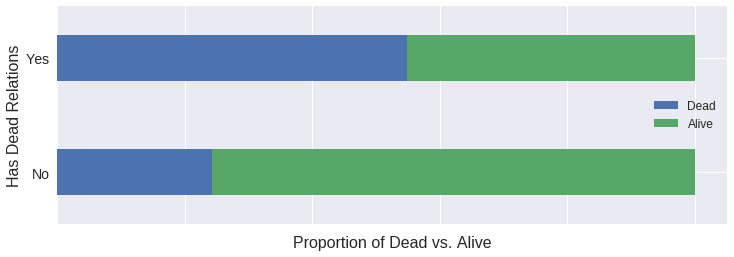

In [25]:
data = character_predictions.groupby(["boolDeadRelations", "isAlive"]).count()["title"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, width = .4)
_ = p.set(yticklabels = ["No", "Yes"], xticklabels = "", xlabel = "Proportion of Dead vs. Alive", ylabel = "Has Dead Relations"), p.legend(["Dead", "Alive"])

p.figure

## Finding Relationship between survival and appearing in more books

In [26]:
character_predictions["no_of_books"] = character_predictions.apply(lambda row: row['book1']+row['book2']+row['book3'] + row['book4'] + row['book5'], axis = 1)

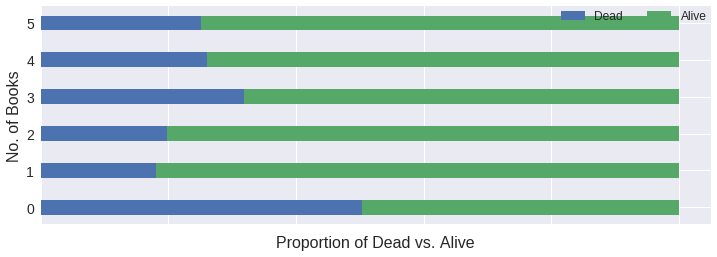

In [27]:
data = character_predictions.groupby(["no_of_books", "isAlive"]).count()["title"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, width = .4)
_ = p.set(xticklabels = "", ylabel = "No. of Books", xlabel = "Proportion of Dead vs. Alive"), p.legend(["Dead", "Alive"], loc = "upper right", ncol = 2, borderpad = -.15)
p.figure

## Finding Relationship between survival and belonging to a noble family

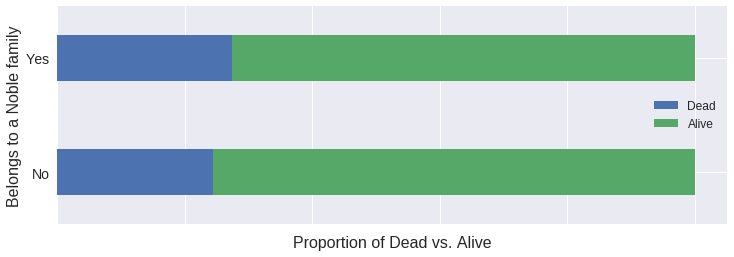

In [28]:
data = character_predictions.groupby(["isNoble", "isAlive"]).count()["title"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, width = .4)
_ = p.set(yticklabels = ["No", "Yes"], xticklabels = "", xlabel = "Proportion of Dead vs. Alive", ylabel = "Belongs to a Noble family"), p.legend(["Dead", "Alive"])

p.figure

## How does house relate to survival (Only house with greater than 10 members have been considered)

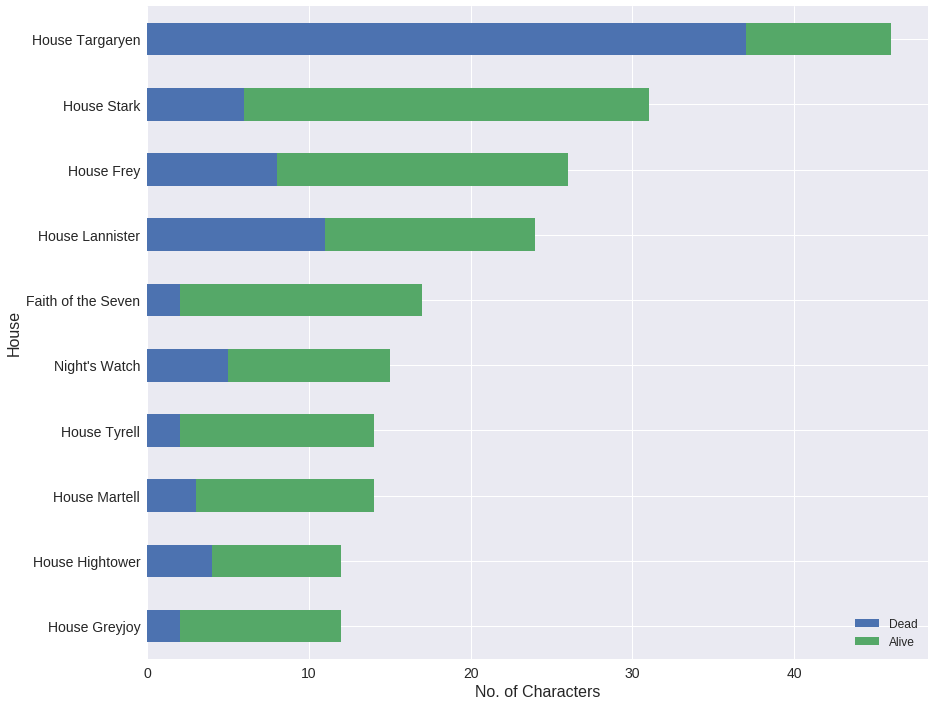

In [29]:
data = character_predictions.groupby(["house", "isAlive"]).count()["title"].unstack().copy(deep = True)
data.loc[:, "total"]= data.sum(axis = 1)
p = data[data['total'] > 10].sort_values("total")[[0, 1]].plot.barh(stacked = True, rot = 0, figsize = (14, 12),)
_ = p.set(xlabel = "No. of Characters", ylabel = "House"), p.legend(["Dead", "Alive"], loc = "lower right")
p.figure